In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('covid-liver.csv')
df.head()

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.47,NaN,0.0,0.7,NaN,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,NaN,NaN,2.0,NaN,NaN,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,NaN,NaN,0.0,NaN,NaN,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN


In [6]:
df.columns.values

array(['Cancer', 'Year', 'Month', 'Bleed', 'Mode_Presentation', 'Age',
       'Gender', 'Etiology', 'Cirrhosis', 'Size', 'HCC_TNM_Stage',
       'HCC_BCLC_Stage', 'ICC_TNM_Stage', 'Treatment_grps',
       'Survival_fromMDM', 'Alive_Dead', 'Type_of_incidental_finding',
       'Surveillance_programme', 'Surveillance_effectiveness',
       'Mode_of_surveillance_detection', 'Time_diagnosis_1st_Tx',
       'Date_incident_surveillance_scan', 'PS', 'Time_MDM_1st_treatment',
       'Time_decisiontotreat_1st_treatment', 'Prev_known_cirrhosis',
       'Months_from_last_surveillance'], dtype=object)

In [24]:
df.isna().sum()

Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treatment            

### Question 1

#### Was there any relationship between age and gender and mortality rate pre and post-pandemic? Aim to find the mean and standard deviation for age and gender in relation to mortality rate.


In [13]:
df.describe()

,Month,Age,Size,Survival_fromMDM,Time_diagnosis_1st_Tx,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Months_from_last_surveillance
count,450.000000,450.000000,400.000000,450.000000,158.000000,448.000000,162.000000,107.000000,112.000000
mean,6.757778,70.371111,53.355000,12.696622,-6.570380,1.225446,2.385988,1.500841,10.649970
std,3.449476,10.572586,40.283257,9.703300,114.312876,1.030008,2.103355,1.492801,12.262525
min,1.000000,27.000000,10.000000,-0.030000,-1434.070000,0.000000,-0.870000,-0.870000,0.330000
25%,4.000000,65.000000,24.000000,4.032500,1.207500,0.000000,1.185000,0.715000,5.566667
50%,7.000000,72.000000,40.000000,10.785000,1.915000,1.000000,1.800000,1.370000,6.300000
75%,10.000000,78.000000,70.500000,21.282500,3.160000,2.000000,2.722500,1.715000,10.600000
max,12.000000,96.000000,220.000000,32.770000,13.570000,4.000000,15.000000,11.900000,82.433333


Text(0.5, 1.0, 'Relationship between Age and Survival Rate Grouped by Year')

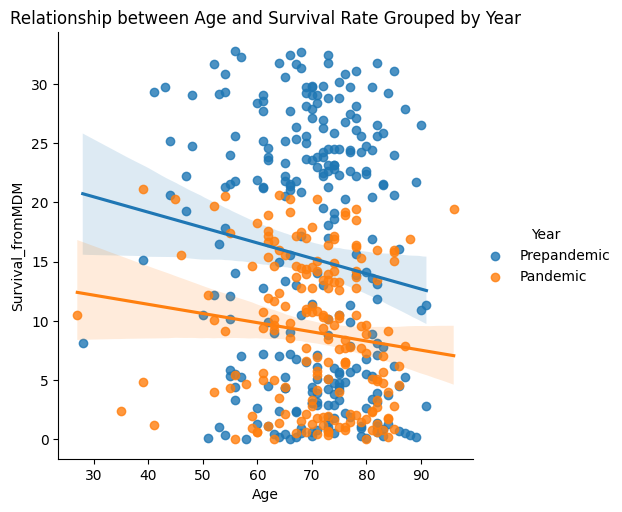

In [21]:
df_srate = df.dropna(subset=['Survival_fromMDM'])
sns.lmplot(df_srate, x='Age', y='Survival_fromMDM', hue='Year')
plt.title('Relationship between Age and Survival Rate Grouped by Year')

Text(0.5, 1.0, 'Survival Rate by Gender, Grouped by Year')

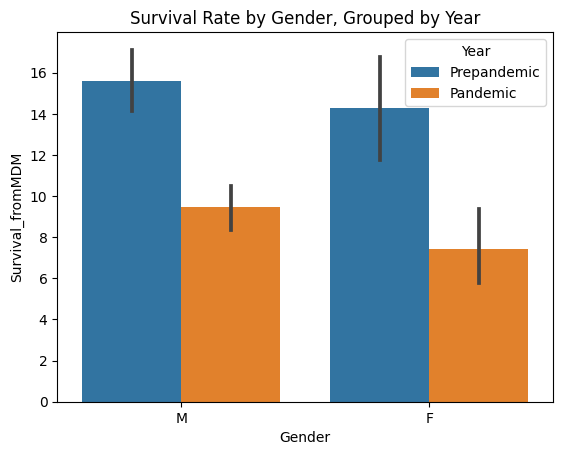

In [25]:
sns.barplot(df_srate, x='Gender', y='Survival_fromMDM', hue= 'Year')
plt.title('Survival Rate by Gender, Grouped by Year')

##### While both pre and post pandemic years show a similar trend of survival rate and age, there is also a clear decrease in survival rate post-pandemic

### Question 2

#### When diagnosed, was there a relationship between tumor size post-pandemic with limited healthcare resources? Viewed as a scatterplot with the x-axis as months during the post-pandemic

In [27]:
df_size = df.dropna(subset=['Size'])

Text(0.5, 1.0, 'Tumor Size by Month, Grouped by Year')

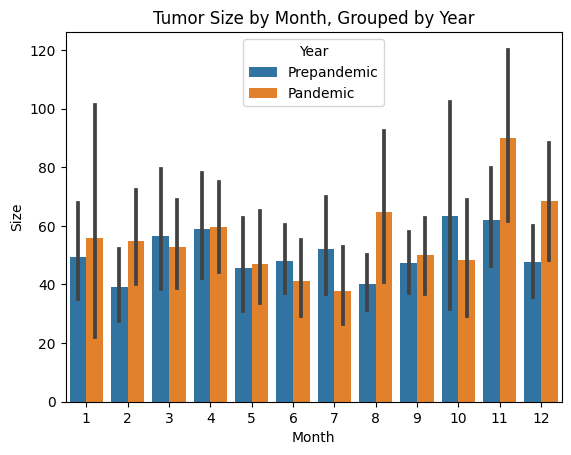

In [28]:
sns.barplot(df_size, x='Month', y='Size',  hue='Year')
plt.title('Tumor Size by Month, Grouped by Year')

In [39]:
avg_size = df_size['Size'].groupby(df_size['Year']).mean()
avg_size.head()

Year
Pandemic       57.578313
Prepandemic    50.358974
Name: Size, dtype: float64

#### There don't appear to be any specific trends between tumor size and month for prepandemic and postpandemic years

### Question 3

#### What did mortality look like pre-pandemic compared to post-pandemic? How does this relate to tumor size/stage? Creation of a bar plot with the x-axis noting the month during either the pre or post-pandemic year category

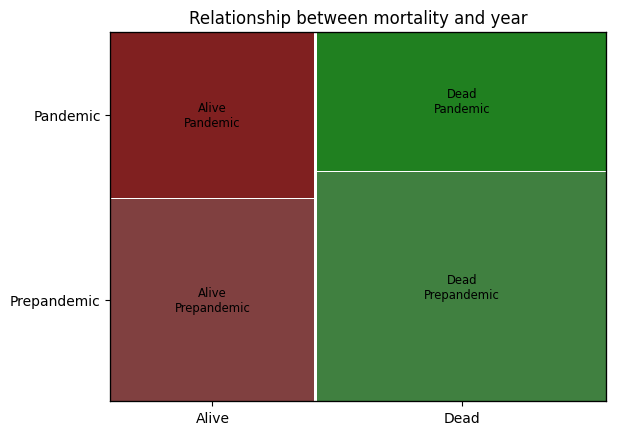

In [35]:
t = mosaic(df, ['Alive_Dead','Year'],title='Relationship between mortality and year')

Text(0, 0.5, 'Survival Rate')

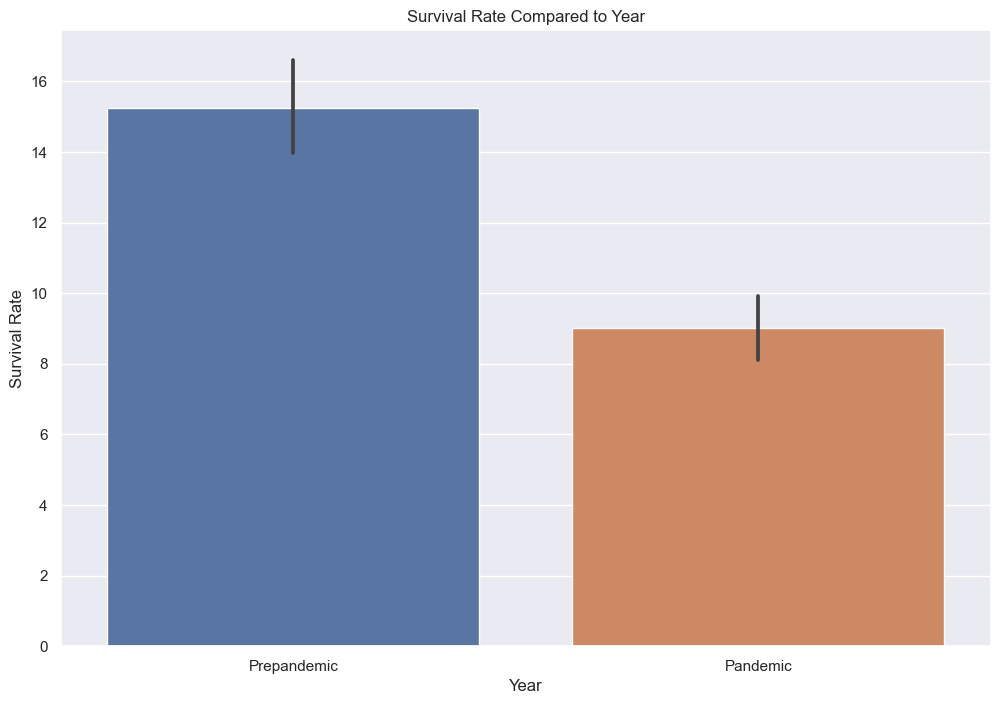

In [42]:
sns.barplot(df_srate, x='Year', y='Survival_fromMDM')
plt.title('Survival Rate Compared to Year')
plt.ylabel('Survival Rate')

### Question 4

#### Did patients with some type of chronic liver disease (CLD) have their cancer progress faster than those without chronic liver disease during the pandemic? What did this look like pre-pandemic? Use a scatterplot with the x-axis as time and the y-axis as staging, factored by the presence or absence of CLD.

<AxesSubplot: xlabel='Month', ylabel='Size'>

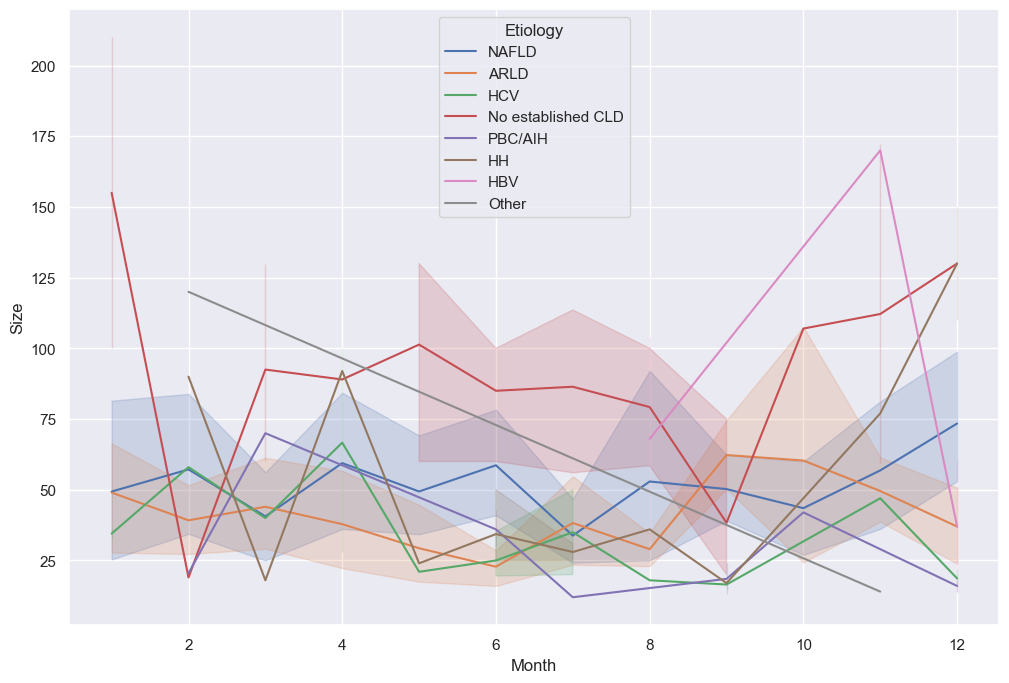

In [43]:
sns.lineplot(df_size, x='Month', y='Size', hue='Etiology')

In [45]:
df_stage = df.dropna(subset=['HCC_TNM_Stage'])

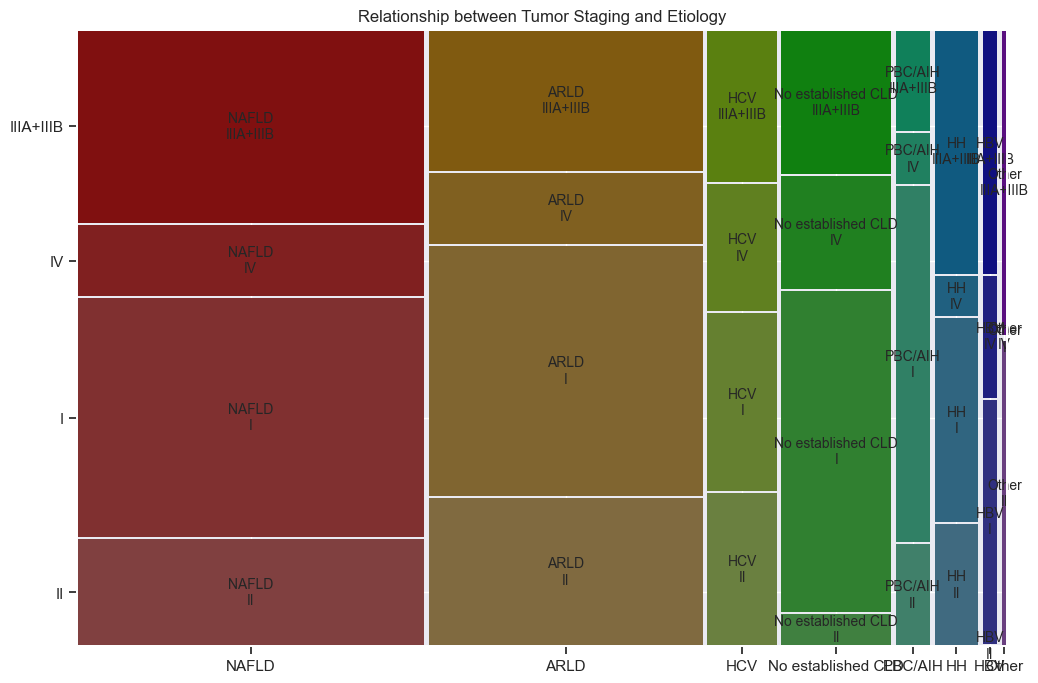

In [46]:
t = mosaic(df_stage, ['Etiology', 'HCC_TNM_Stage'],title='Relationship between Tumor Staging and Etiology')
sns.set(rc={"figure.figsize":(12, 8)})

### Question 5
#### Did the number of patients who were symptomatic before diagnosis increase post-pandemic?


<AxesSubplot: xlabel='Mode_Presentation', ylabel='Count'>

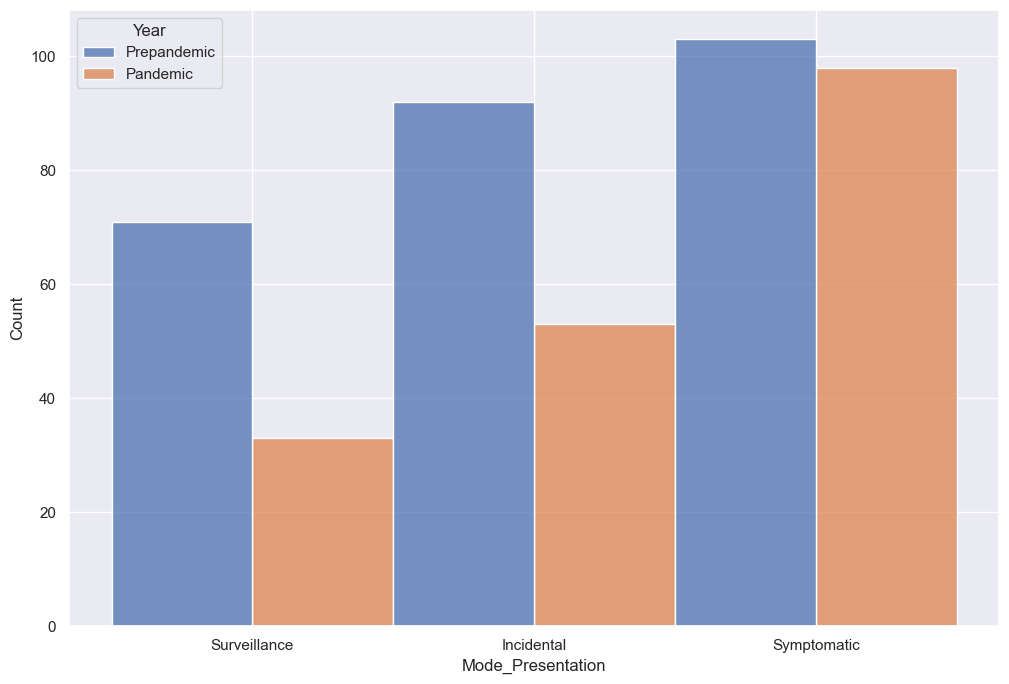

In [33]:
sns.histplot(df, x='Mode_Presentation', hue='Year', multiple='dodge')

### Question 6

#### How was the timing between the decision to treat and the first treatment change from pre-pandemic to post-pandemic? What about the time from the initial diagnosis to the first treatment? Aim to use a boxplot to visualize where most data falls and determine any outliers.

In [47]:
df_dtreat = df.dropna(subset=['Time_decisiontotreat_1st_treatment'])

Text(0, 0.5, 'Treatment decision and 1st treatment timeline (months)')

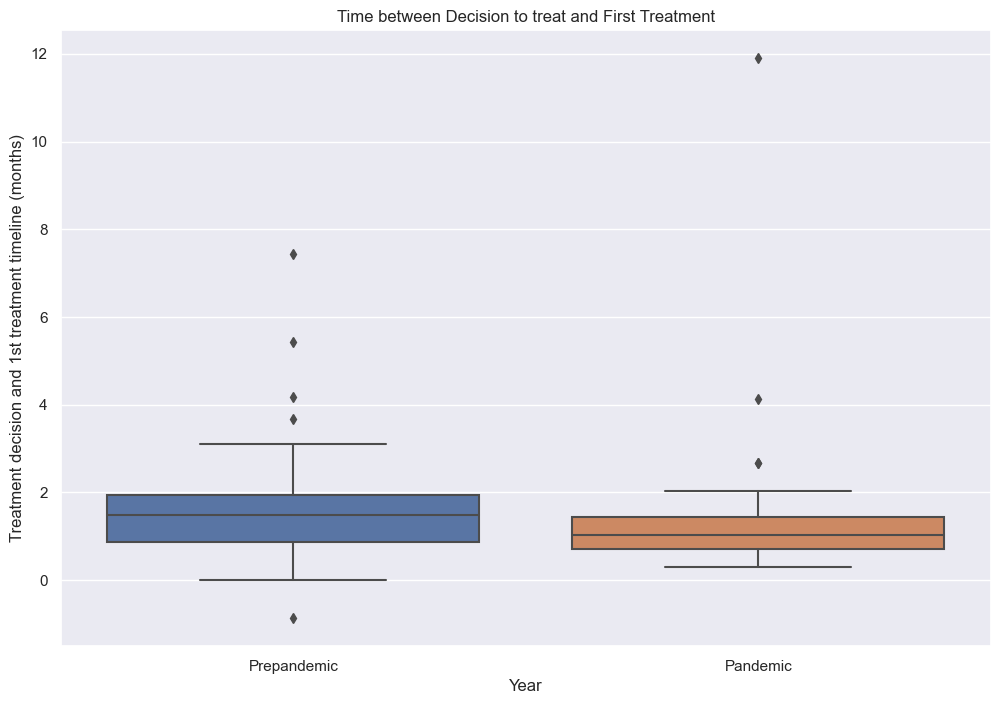

In [49]:
sns.boxplot(df_dtreat, x='Year', y='Time_decisiontotreat_1st_treatment')
plt.title('Time between Decision to treat and First Treatment')
plt.ylabel('Treatment decision and 1st treatment timeline (months)')

In [50]:
df_diagtreat = df.dropna(subset=['Time_diagnosis_1st_Tx'])

Text(0, 0.5, 'Time from diagnosis to first treatment (months)')

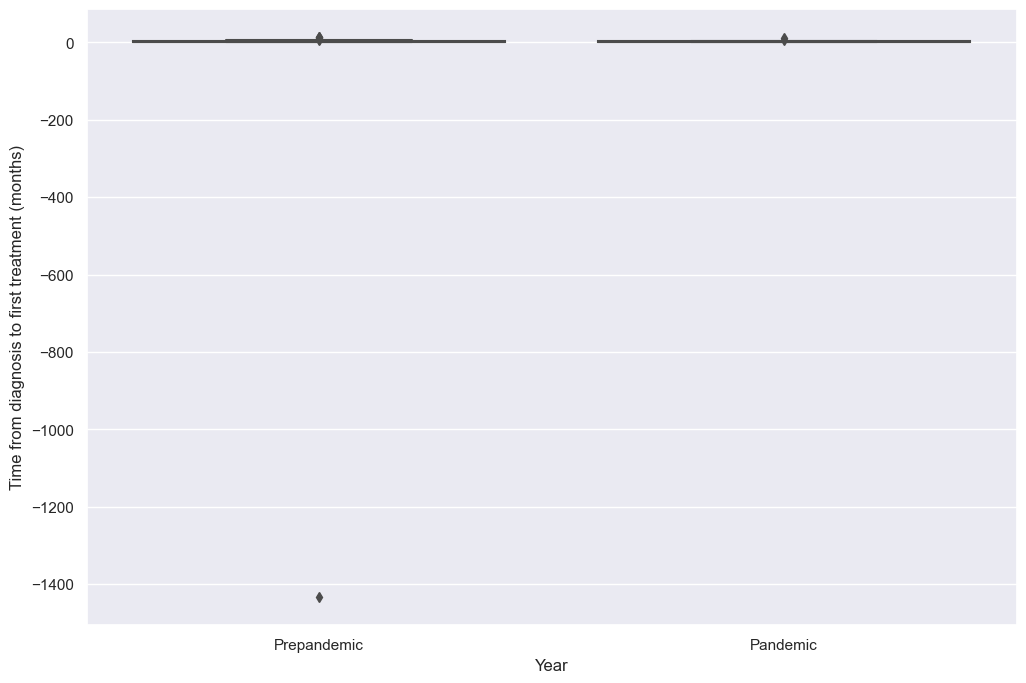

In [52]:
sns.boxenplot(df_diagtreat, x='Year', y='Time_diagnosis_1st_Tx')
plt.ylabel('Time from diagnosis to first treatment (months)')

Text(0, 0.5, 'Time from Diagnosis to First Treatment (Months)')

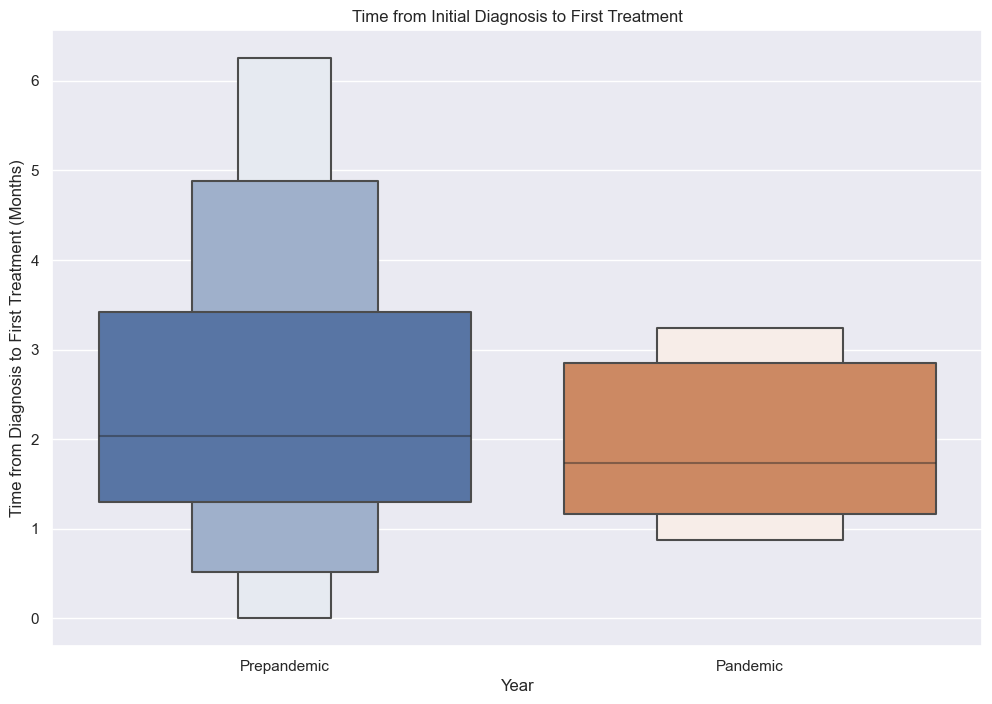

In [53]:
sns.boxenplot(df_diagtreat, x='Year', y='Time_diagnosis_1st_Tx', showfliers=False)
plt.title("Time from Initial Diagnosis to First Treatment")
plt.ylabel("Time from Diagnosis to First Treatment (Months)")

#### There is one outlier at -1400 months. Reviewed data, not sure how this is a negative value.

### Question 7

#### Did metastasis staging change post-pandemic? Use of a time series to see the difference, if any, of malignancy stage over time.

<AxesSubplot: xlabel='Month', ylabel='HCC_TNM_Stage'>

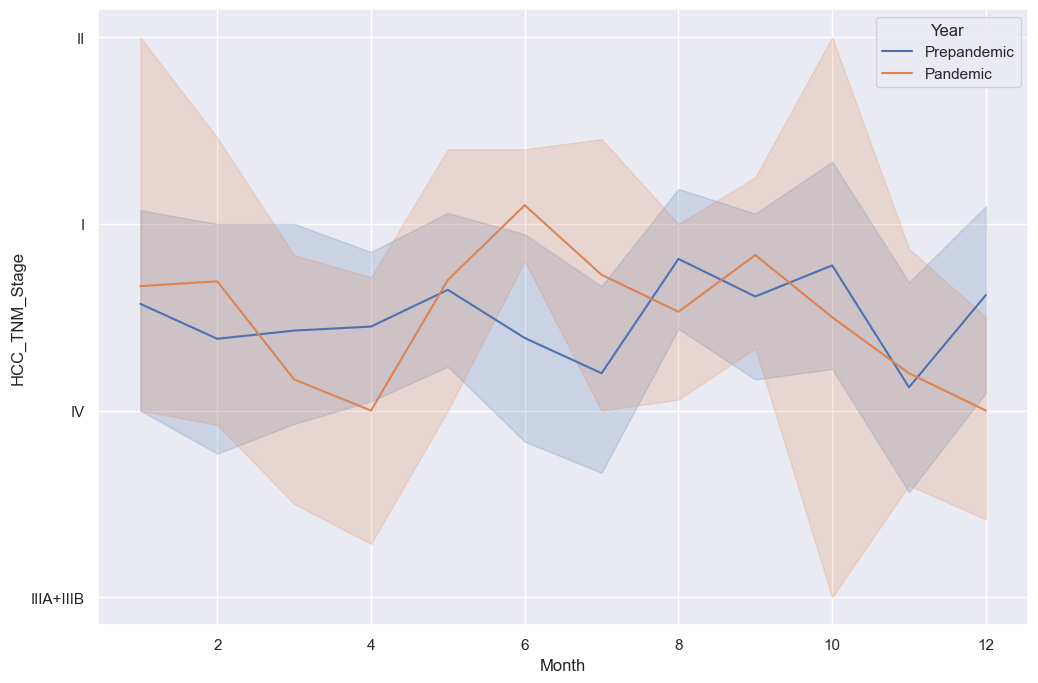

In [54]:
sns.lineplot(df_stage, x='Month', y='HCC_TNM_Stage', hue='Year')

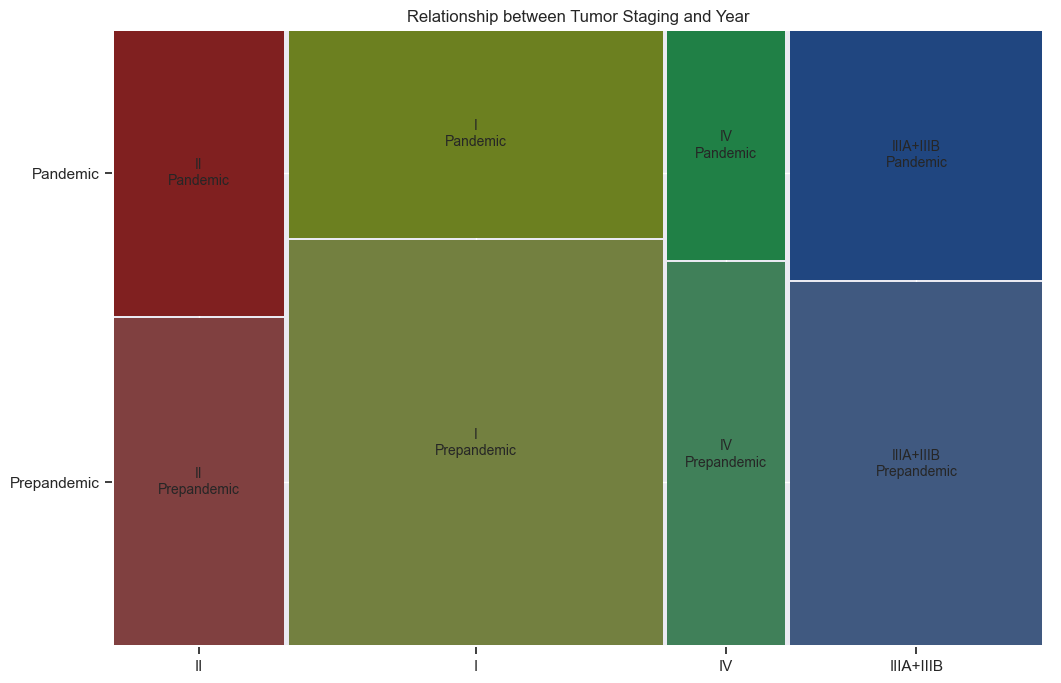

In [55]:
t = mosaic(df_stage, ['HCC_TNM_Stage','Year'],title='Relationship between Tumor Staging and Year')

### Question 8 

#### What does the distribution of patients enrolled in surveillance programs look like post-pandemic?

In [56]:
df_surv = df.dropna(subset=['Surveillance_programme'])

<AxesSubplot: xlabel='Surveillance_programme', ylabel='Count'>

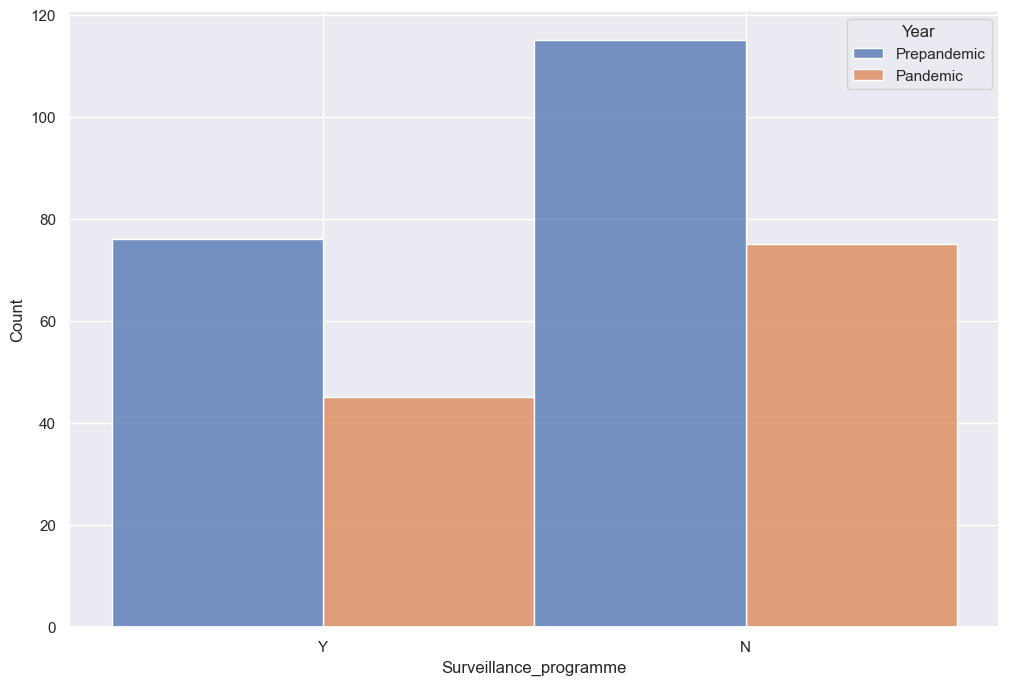

In [57]:
sns.histplot(df_surv, x='Surveillance_programme', hue='Year', multiple='dodge')